<a href="https://colab.research.google.com/github/ll3091/ANLY-580-01-NLP-Project/blob/master/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Project: Data Exploration & Cleaning

In [1]:
# connect to Google Drive
from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
# import packages
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Trump Tweets

In [3]:
# source https://github.com/nprapps/trump-tweet-analysis
! wget https://raw.githubusercontent.com/nprapps/trump-tweet-analysis/master/data/since-20170120-processed.json

--2018-11-20 02:21:17--  https://raw.githubusercontent.com/nprapps/trump-tweet-analysis/master/data/since-20170120-processed.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1991459 (1.9M) [text/plain]
Saving to: ‘since-20170120-processed.json’

since-20170120-proc 100%[===================>]   1.90M  --.-KB/s    in 0.04s   

2018-11-20 02:21:18 (46.6 MB/s) - ‘since-20170120-processed.json’ saved [1991459/1991459]



In [0]:
# read in json files
file = 'since-20170120-processed.json'

with open(file, 'r', encoding = 'utf-8') as inputjson:
  trump_tweets_json = json.loads(inputjson.read())

In [5]:
# number of tweets
len(trump_tweets_json)

4575

In [6]:
# extract tweet
trump_tweets = ['Trump tweets: '+t['text'] for t in trump_tweets_json]
# longest tweet
max([len(t) for t in trump_tweets])

334

In [7]:
# first 10 extracted tweets
trump_tweets[:10]

['Trump tweets: Still can’t believe that Bloomberg violated a firm OFF THE RECORD statement. Will they put out an apology?',
 'Trump tweets: Great day in North Carolina where Republicans will do very well!',
 'Trump tweets: The ABC/Washington Post Poll was by far the least accurate one 2 weeks out from the 2016 Election. I call it a suppression poll - but by Election Day they brought us, out of shame, to about even. They will never learn!',
 'Trump tweets: .@Rasmussen_Poll just came out at 48% approval rate despite the constant and intense Fake News. Higher than Election Day and higher than President Obama. Rasmussen was one of the most accurate Election Day polls!',
 'Trump tweets: https://t.co/c79zLeREOA',
 'Trump tweets: “President Donald J. Trump is Strengthening Retirement Security for American Workers” https://t.co/cKeATuKXDe',
 'Trump tweets: Wow, I made OFF THE RECORD COMMENTS to Bloomberg concerning Canada, and this powerful understanding was BLATANTLY VIOLATED. Oh well, just 

In [0]:
# write tweets to txt file
file_out = 'trump_tweets.txt'

with open(file_out, 'w', encoding = 'utf-8') as outputTxt:
  outputTxt.write('\n\n'.join(trump_tweets))

In [9]:
# check size of file
! ls -l trump_tweets.txt

-rw-r--r-- 1 root root 815655 Nov 20 02:21 trump_tweets.txt


In [0]:
# copy to drive
! cp trump_tweets.txt ./gdrive/'My Drive'/NLPProject

In [11]:
# look at new txt file
! cat trump_tweets.txt | head

Trump tweets: Still can’t believe that Bloomberg violated a firm OFF THE RECORD statement. Will they put out an apology?

Trump tweets: Great day in North Carolina where Republicans will do very well!

Trump tweets: The ABC/Washington Post Poll was by far the least accurate one 2 weeks out from the 2016 Election. I call it a suppression poll - but by Election Day they brought us, out of shame, to about even. They will never learn!

Trump tweets: .@Rasmussen_Poll just came out at 48% approval rate despite the constant and intense Fake News. Higher than Election Day and higher than President Obama. Rasmussen was one of the most accurate Election Day polls!

Trump tweets: https://t.co/c79zLeREOA



## Motivational Quotes

In [12]:
# source https://github.com/mubaris/motivate
! git clone https://github.com/mubaris/motivate.git
! ls

Cloning into 'motivate'...
remote: Enumerating objects: 1356, done.
remote: Total 1356 (delta 0), reused 0 (delta 0), pack-reused 1356
Receiving objects: 100% (1356/1356), 647.64 KiB | 1.38 MiB/s, done.
Resolving deltas: 100% (725/725), done.
gdrive	motivate  sample_data  since-20170120-processed.json  trump_tweets.txt


In [13]:
# move into directory
% cd motivate/motivate/data

/content/motivate/motivate/data


In [0]:
# collect file names
files = os.listdir()

In [0]:
# extract quotes
quotes = []
for f in files:
  with open(f, 'r', encoding = 'utf-8') as inputjson:
    quote_json = json.loads(inputjson.read())['data']
    qts = [q['author']+': '+q['quote'] for q in quote_json]
    quotes += qts

In [16]:
# number of quotes
len(quotes)

4136

In [17]:
# longest quote
max([len(t) for t in quotes])

421

In [18]:
# first 10 quotes
quotes[:10]

['Ellen Goodman: We ought to walk through the rooms of our lives not looking for flaws, but looking for potential.',
 'Jim Rohn:  If you are not willing to risk the usual you will have to settle for the ordinary. ',
 'Walt Disney: All our dreams can come true if we have the courage to pursue them.',
 'Winston Churchill: Success is walking from failure to failure with no loss of enthusiasm.',
 'Chris Grosser: Opportunities don’t happen, you create them.',
 'Albert Einstein: Try not to become a person of success, but rather try to become a person of value.',
 'Eleanor Roosevelt: Great minds discuss ideas; average minds discuss events; small minds discuss people.',
 'Thomas A. Edison:  I have not failed. I’ve just found 10,000 ways that won’t work.',
 'Oscar Wilde: What seems to us as bitter trials are often blessings in disguise.',
 'Bruce Feirstein: The distance between insanity and genius is measured only by success. ']

In [0]:
# write quotes to txt file
file_out = 'motivational_quotes.txt'

with open(file_out, 'w', encoding = 'utf-8') as outputTxt:
  outputTxt.write('\n\n'.join(quotes))

In [20]:
# check size of file
! ls -l motivational_quotes.txt

-rw-r--r-- 1 root root 486089 Nov 20 02:21 motivational_quotes.txt


In [21]:
# move into top directory
% cd ../../..

/content


In [0]:
# copy txt file to drive
! cp ./motivate/motivate/data/motivational_quotes.txt ./gdrive/'My Drive'/NLPProject

In [23]:
# look at new txt file
! cat ./motivate/motivate/data/motivational_quotes.txt | head

Ellen Goodman: We ought to walk through the rooms of our lives not looking for flaws, but looking for potential.

Jim Rohn:  If you are not willing to risk the usual you will have to settle for the ordinary. 

Walt Disney: All our dreams can come true if we have the courage to pursue them.

Winston Churchill: Success is walking from failure to failure with no loss of enthusiasm.

Chris Grosser: Opportunities don’t happen, you create them.



## Jokes

In [24]:
# source https://github.com/taivop/joke-dataset
! wget https://raw.githubusercontent.com/taivop/joke-dataset/master/stupidstuff.json
! wget https://raw.githubusercontent.com/taivop/joke-dataset/master/wocka.json
! wget https://raw.githubusercontent.com/taivop/joke-dataset/master/reddit_jokes.json

--2018-11-20 02:21:40--  https://raw.githubusercontent.com/taivop/joke-dataset/master/stupidstuff.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2616857 (2.5M) [text/plain]
Saving to: ‘stupidstuff.json’

stupidstuff.json    100%[===================>]   2.50M  --.-KB/s    in 0.04s   

2018-11-20 02:21:41 (60.9 MB/s) - ‘stupidstuff.json’ saved [2616857/2616857]

--2018-11-20 02:21:42--  https://raw.githubusercontent.com/taivop/joke-dataset/master/wocka.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7718338 (7.4M) [text/plain]
Savi

In [0]:
# read in json files
files = ['stupidstuff.json', 'wocka.json', 'reddit_jokes.json']

json_list = []
for f in files:
  with open(f, 'r', encoding = 'utf-8') as inputjson:
    jokes_json = json.loads(inputjson.read())
  json_list.append(jokes_json)

In [26]:
# compare files
for jokes in json_list:
  print('Number of jokes in file:', len(jokes), 
        '==>', jokes[0].keys(), '\n\t', jokes[0])

Number of jokes in file: 3773 ==> dict_keys(['body', 'category', 'id', 'rating']) 
	 {'body': 'A blackjack dealer and a player with a thirteen count in his hand\nwere arguing about whether or not it was appropriate to tip the\ndealer.\n\nThe player said, "When I get bad cards, it\'s not the dealer\'s fault.\nAccordingly, when I get good cards, the dealer obviously had nothing\nto do with it so, why should I tip him?"\n\nThe dealer said, "When you eat out do you tip the waiter?"\n\n"Yes."\n\n"Well then, he serves you food, I\'m serving you cards, so you should\ntip me."\n\n"Okay, but, the waiter gives me what I ask for. I\'ll take an eight."', 'category': 'Children', 'id': 1, 'rating': 2.63}
Number of jokes in file: 10019 ==> dict_keys(['body', 'category', 'id', 'title']) 
	 {'body': 'What do you call a cow with no legs?\r\n\r\nGround Beef!', 'category': 'Animal', 'id': 1, 'title': 'Cow With No Legs'}
Number of jokes in file: 194553 ==> dict_keys(['body', 'id', 'score', 'title']) 
	 {'b

In [0]:
# keep wocka file
jokes_json = json_list[1]

In [28]:
# extract jokes
jokes = [j['title']+': '+j['body'].replace('\r\n', '\n\t') for j in jokes_json]
# longest joke
joke_len = [len(j) for j in jokes]
max(joke_len)

63272

In [29]:
# print some of the longest joke
print(jokes[np.argmax(joke_len)][:500])

Cra-Z Laws X-treme!: Due to high demmand, I will not maker you wait for all 50 states to come out, instead, here is ALL OF THE 51 states of laws.
	
	
	Alabama
	â¢ A 1950 anti-obscenity law in Irondale, Ala., prohibited any showing of anyone nude or "in a substantially nude state" except a babe in arms. 
	â¢ Anniston: You may not wear blue jeans down Noble Street. 
	â¢ An ordinance in Linden, Ala., provided that all women of "uncertain chastity" had to be off the streets by 9 p.m. 
	â¢ Bear w


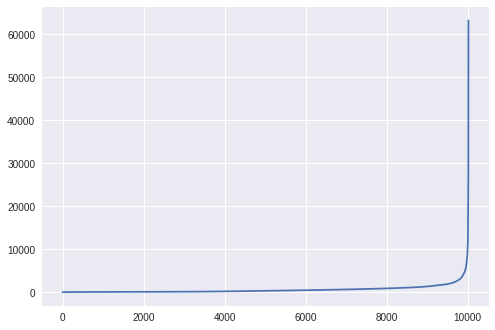

In [30]:
# look at distribution of joke lengths
plt.plot(sorted(joke_len))
plt.show()

In [31]:
# length of 8000th longest joke
sorted(joke_len)[8000]

899

In [32]:
# remove jokes over 900 char long
jokes = [j for j in jokes if len(j)<=900]
# new longest joke
joke_len = [len(j) for j in jokes]
max(joke_len)

900

In [33]:
# number of jokes left 
len(jokes)

8007

In [34]:
# first 10 jokes
jokes[:10]

['Cow With No Legs: What do you call a cow with no legs?\n\t\n\tGround Beef!',
 'Jumping Cow: What do you call a cow jumping over a barbed wire fence?\n\t\n\tUtter destruction.',
 "Black, White and Red: What's black and white and red all over?\n\t\n\tA newspaper.",
 'Guy in a Bar: So, this guy walks into a bar.\n\t\n\tAnd says, "ouch".',
 "Progress: If the opposite of pro is con, isn't the opposite of progress, congress?",
 'Guy with no Limbs: What do you call a guy with no arms or legs floating in the ocean?\n\t\n\tBob!',
 "Antenna: I went to a wedding the other day.  Two antennas were getting married.  It wasn't much of a wedding ceremony, but it was one heck of a reception!",
 "Into the Bar: There's this dyslexic guy... he walked into a bra...",
 'Rain: Joel: "How\'s the progress on new house that you are building Pete?"\n\tPeter: "Things are really slow at the moment."\n\tJoel: "Yeah, I guess all this rain would be putting a dampener on things..."',
 'White Horse: A white horse wal

In [0]:
# write jokes to txt file
file_out = 'jokes.txt'

with open(file_out, 'w', encoding = 'utf-8') as outputTxt:
  outputTxt.write('\n\n'.join(jokes))

In [36]:
# check size of file
! ls -l jokes.txt

-rw-r--r-- 1 root root 2449756 Nov 20 02:21 jokes.txt


In [0]:
# copy to drive
! cp jokes.txt ./gdrive/'My Drive'/NLPProject

In [38]:
# look at new txt file
! cat jokes.txt | head

Cow With No Legs: What do you call a cow with no legs?
	
	Ground Beef!

Jumping Cow: What do you call a cow jumping over a barbed wire fence?
	
	Utter destruction.

Black, White and Red: What's black and white and red all over?
	


## Song Lyrics

In [0]:
# source https://www.kaggle.com/mousehead/songlyrics
song_path = "./gdrive/My Drive/NLPProject/songdata.csv"

In [0]:
# read in csv file as a dataframe
song_df = pd.read_csv(song_path)

In [77]:
# number of songs
len(song_df)

57650

In [76]:
# first ten songs
song_df[:10]

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong \nYou're enc..."
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,I was out with the morning sun \nCouldn't sle...
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,I'm waitin' for you baby \nI'm sitting all al...


In [84]:
# number of songs by artist
song_df.artist.value_counts()

Donna Summer                                    191
Gordon Lightfoot                                189
George Strait                                   188
Bob Dylan                                       188
Loretta Lynn                                    187
Alabama                                         187
Reba Mcentire                                   187
Cher                                            187
Dean Martin                                     186
Chaka Khan                                      186
Hank Williams Jr.                               185
Neil Young                                      185
Cliff Richard                                   184
Nazareth                                        184
Indigo Girls                                    184
America                                         184
Johnny Cash                                     183
Kiss                                            183
Chris Rea                                       182
Bon Jovi    

In [106]:
num_songs = [1000, 5000, 10000, 25000]

for n in num_songs:
  songs = []
  maxlen = 0
  for i, r in song_df.sample(n, random_state=n).iterrows():
    s = '-'+r['song']+' by '+r['artist']+'-\n'+r['text']
    songs.append(s)
    maxlen = max(maxlen, len(s))
    
  # write song sample to txt file
  file_out = 'songs'+str(n)+'.txt'
  with open(file_out, 'w', encoding = 'utf-8') as outputTxt:
    outputTxt.write('\n\n'.join(songs))
  print(maxlen)

3991
4021
4021
4032


In [108]:
# check size of files 1000, 5000, 10000, 25000
! ls -l songs1000.txt
! ls -l songs5000.txt
! ls -l songs10000.txt
! ls -l songs25000.txt

-rw-r--r-- 1 root root 1206870 Nov 20 03:43 songs1000.txt
-rw-r--r-- 1 root root 6038842 Nov 20 03:43 songs5000.txt
-rw-r--r-- 1 root root 12109296 Nov 20 03:43 songs10000.txt
-rw-r--r-- 1 root root 30383967 Nov 20 03:43 songs25000.txt


In [0]:
# copy to drive
! cp songs1000.txt ./gdrive/'My Drive'/NLPProject
! cp songs5000.txt ./gdrive/'My Drive'/NLPProject
! cp songs10000.txt ./gdrive/'My Drive'/NLPProject
! cp songs25000.txt ./gdrive/'My Drive'/NLPProject

In [110]:
# look at new txt file
! cat songs1000.txt | head

-Outside Chance by Counting Crows-
(Original by The Turtles - written by Warron Zevon )  
  
You can try to please me  
But it won't be easy  
Stone walls surround me  
I'm surprised that you even found me  
Chorus:  
And you don't stand an outside chance  
(you don't stand an outside chance)  


## Food Recipes

## Academic Papers

## Novels